<a href="https://colab.research.google.com/github/TrovaBruno/Aulas_Noriega_2k24_2/blob/main/Aula5_01_10_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.datasets import load_iris

In [29]:
from sklearn import tree

In [30]:
iris = load_iris()
print(iris['DESCR']) ##baixamos a base de dados iris

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [41]:
print(iris.data[52]) ##pegando o elemento 52 dos dados da iris

[6.9 3.1 4.9 1.5]


In [31]:
from sklearn.model_selection import train_test_split ##A função train_test_split da biblioteca scikit-learn é usada para dividir arrays ou matrizes em subconjuntos aleatórios de treino e teste.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris
.target, test_size=0.25) #iris.data: Contém as características (features) das flores Iris
##iris.target: Contém as classes (espécies) das flores Iris.
##test_size=0.25: Especifica que 25% dos dados devem ser usados para teste e 75% para treino.

In [33]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3) ##tree.DecisionTreeClassifier: Cria um classificador de árvore de decisão.
##criterion='entropy': Usa a entropia como critério para medir a qualidade das divisões.
##max_depth=3: Limita a profundidade máxima da árvore a 3 níveis, para evitar overfitting.
clf = clf.fit(X_train, y_train) ##clf.fit(X_train, y_train): Treina o modelo usando os dados de treino (X_train) e as classes correspondentes (y_train).
predictions = clf.predict(X_test)
##clf.predict(X_test): Usa o modelo treinado para prever as classes dos dados de teste (X_test).
##predictions: Armazena as previsões feitas pelo modelo.

In [34]:
import pandas as pd

In [35]:
print("\nMatriz de confusão detalhada:\n",
pd.crosstab(y_test, predictions, rownames=['Real'], colnames=
['Predito'],
margins=True, margins_name='Todos'))
##pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito']): Cria uma tabela de contingência (matriz de confusão) que compara os valores reais (y_test) com as previsões (predictions).
##rownames=['Real']: Nomeia as linhas da tabela como “Real”, representando as classes verdadeiras.
##colnames=['Predito']: Nomeia as colunas da tabela como “Predito”, representando as classes previstas.
##margins=True: Adiciona margens à tabela, que mostram os totais das linhas e colunas.
##margins_name='Todos': Nomeia a margem adicionada como “Todos”.


Matriz de confusão detalhada:
 Predito   0   1  2  Todos
Real                     
0        15   0  0     15
1         0  14  2     16
2         0   0  7      7
Todos    15  14  9     38


In [36]:
import sklearn.metrics as metrics ##A biblioteca metrics do scikit-learn contém várias funções para avaliar a performance de modelos de machine learning.

In [37]:
print("Relatório sobre a qualidade:\n") ##Exibe uma mensagem indicando que o relatório de qualidade será mostrado a seguir.
print(metrics.classification_report(y_test, predictions, target_names=['Setosa', 'Versicolor', 'Virgínica']))
#metrics.classification_report(y_test, predictions, target_names=['Setosa', 'Versicolor', 'Virgínica']): Gera um relatório detalhado sobre a performance do modelo.
#y_test: Classes verdadeiras dos dados de teste.
#predictions: Classes previstas pelo modelo.
#target_names=['Setosa', 'Versicolor', 'Virgínica']: Nomes das classes para facilitar a leitura do relatório.

Relatório sobre a qualidade:

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       1.00      0.88      0.93        16
   Virgínica       0.78      1.00      0.88         7

    accuracy                           0.95        38
   macro avg       0.93      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38



In [38]:
import graphviz ##A biblioteca graphviz é usada para criar visualizações de grafos, como árvores de decisão.

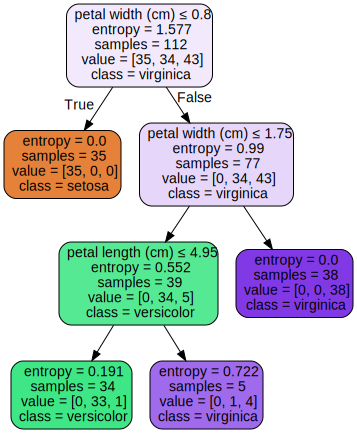

In [39]:
dot_data = tree.export_graphviz(clf, out_file=None) ##tree.export_graphviz(clf, out_file=None): Exporta a árvore de decisão clf para o formato DOT, que é um formato de texto usado pelo graphviz.
graph = graphviz.Source(dot_data)##graphviz.Source(dot_data): Cria uma fonte de gráfico a partir dos dados DOT.
graph.render("iris") ##graph.render("iris"): Renderiza o gráfico e salva como um arquivo com o nome “iris”.
dot_data = tree.export_graphviz(clf, out_file=None,
feature_names=iris.feature_names,
class_names=iris.target_names,
filled=True, rounded=True,
special_characters=True)
##feature_names=iris.feature_names: Adiciona os nomes das características (features) das flores Iris.
##class_names=iris.target_names: Adiciona os nomes das classes (espécies) das flores Iris.
##filled=True: Preenche os nós da árvore com cores.
##rounded=True: Usa nós arredondados.
##special_characters=True: Permite o uso de caracteres especiais.
graph = graphviz.Source(dot_data, format="png") ##graphviz.Source(dot_data, format="png"): Cria uma fonte de gráfico a partir dos dados DOT e especifica o formato de saída como PNG.
graph ##graph: Exibe o gráfico gerado.